<a href="https://colab.research.google.com/github/seniru2001/Pytorch1/blob/main/Pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
    # Input Layer (4 features of the flower)
    # Hidden Layer1 (number of neurons)
    # H2 (number of neurons)
    # Output (3 classes of iris flower)
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)  # First hidden layer
        self.fc2 = nn.Linear(h1, h2)          # Second hidden layer
        self.out = nn.Linear(h2, out_features)  # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU to first layer
        x = torch.relu(self.fc2(x))  # Apply ReLU to second layer
        x = self.out(x)              # Output layer (no activation for logits)
        return x

In [ ]:
#pick a manual seed for randomization
torch.manual_seed(41)
#create an instance of model
model=Model()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df=pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
my_df['variety']=my_df['variety'].replace('Setosa',0.0)
my_df['variety']=my_df['variety'].replace('Versicolor',1.0)
my_df['variety']=my_df['variety'].replace('Virginica',2.0)
my_df

<ipython-input-8-2769f6c520e0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety']=my_df['variety'].replace('Virginica',2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# Train Test Split !set X,y
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [ ]:
# convert them into numpy arrays
X= X.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=41
)

In [ ]:
#convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [ ]:
#convert y label to tensors long
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)


In [ ]:
#set the criterion of model to measure the error
criterion= nn.CrossEntropyLoss()
#chosse optimizer,lr= learning rate(if error doesnt go down after bunch of iterations(epochs)lower our learning rate
optimizer= torch.optim.Adam(model.parameters(),lr=0.01)

In [ ]:
# Convert X_train and y_train to PyTorch Tensors if they are NumPy arrays
import numpy as np
if isinstance(X_train, np.ndarray):
    X_train = torch.tensor(X_train, dtype=torch.float32)  # Features are usually floats
if isinstance(y_train, np.ndarray):
    y_train = torch.tensor(y_train, dtype=torch.long)  # Labels must be integers for CrossEntropyLoss

# Train our model!
epochs = 100
losses = []

for i in range(epochs):
    # Go forward and get a prediction
    y_pred = model.forward(X_train)  # Use model(X_train), equivalent to model.forward(X_train)

    # Measure the loss/error
    loss = criterion(y_pred, y_train)  # Ensure y_train is a PyTorch Tensor

    # Keep track of our losses
    losses.append(loss.detach().numpy())

    # Print every 10 epoch
    if i%10==0:
        print(f'Epoch: {i}, loss: {loss}')

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0, loss: 1.125203251838684
Epoch: 10, loss: 1.0097211599349976
Epoch: 20, loss: 0.8162348866462708
Epoch: 30, loss: 0.585993230342865
Epoch: 40, loss: 0.4003390073776245
Epoch: 50, loss: 0.2679471969604492
Epoch: 60, loss: 0.1796349734067917
Epoch: 70, loss: 0.12165623158216476
Epoch: 80, loss: 0.0860651433467865
Epoch: 90, loss: 0.06522615998983383


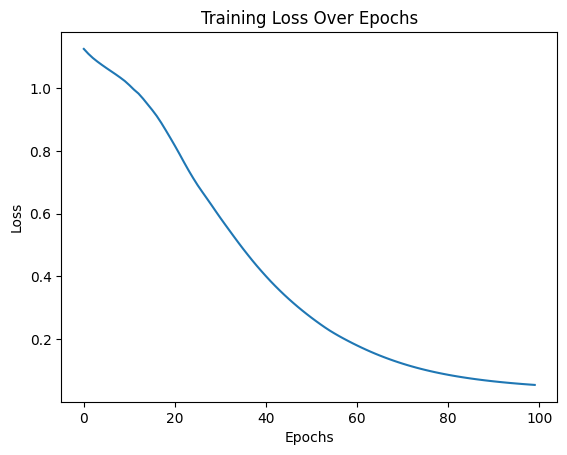

In [ ]:
# Plot the training loss
plt.plot(range(epochs), losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.show()

In [ ]:
# Ensure X_test and y_test are tensors
if isinstance(X_test, np.ndarray):
    X_test = torch.tensor(X_test, dtype=torch.float32)  # Convert to float tensor for features
if isinstance(y_test, np.ndarray):
    y_test = torch.tensor(y_test, dtype=torch.long)  # Convert to long tensor for labels


# Evaluate the model on the test set
with torch.no_grad():  # Turn off gradient calculation
    y_eval = model(X_test)  # Forward pass
    loss = criterion(y_eval, y_test)  # Calculate the loss
    print(f"Validation Loss on Test Set: {loss.item():.4f}")

Validation Loss on Test Set: 0.1315


In [ ]:
correct = 0

with torch.no_grad():  # Disable gradient computation for evaluation
    for i, data in enumerate(X_test):  # Loop through the test data
        y_val = model.forward(data)  # Perform a forward pass on the model

        # Print details: the predicted value, true value, and predicted class
        print(f'{i + 1}. {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

        # Check if the predicted class matches the true class
        if y_val.argmax().item() == y_test[i]:
            correct += 1

# Print the total number of correct predictions
print(f'We got {correct} correct!')

1. tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2. tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3. tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4. tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5. tensor([-7.1838,  4.8757,  8.3024]) 	 2 	 2
6. tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7. tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8. tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9. tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10. tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11. tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12. tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13. tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14. tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15. tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16. tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17. tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18. tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19. tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20. tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21. tensor([-2.6161,  4.5584,  0.8575]) 	 1 	 1
2